# Шкарбаненко Михаил, Б05-907

#Задача 4.1

На основе представленной ниже языковой модели требуется:

1. Выбрать наиболее вероятную последовательность слов, которая начинается со слова <start> и заканчивается словом <end>.

2. Выбрать последовательность токенов, которая начинается со слова <start> и заканчивается словом <end> и имеет максимальный $score = \frac{1}{l}\sum_{i=1}^{l} \log p(w_i|w_{i-1})$, где $l$ задает длину полученной последовательности.

```
p(обучение|<start>)=0.14
p(<end>|машинный)=0.5
p(<end>|обучение)=0.5
p(не|обучение)=0.5
p(без|возможно)=0.5
p(без|<start>)=0.14
p(не|<start>)=0.14
p(<end>|без)=0.5
p(<end>|не)=0.5
p(обучение|машинный)=0.5
p(<end>|статистика)=1.0
p(возможно|не)=0.5
p(возможно|<start>)=0.14
p(машинный|<start>)=0.29
p(статистика|<start>)=0.14
p(статистика|без)=0.5
p(<end>|возможно)=0.5
```

Все выкладки должны быть сделаны аналитически, без использования компьютера. Важно: решением при помощи полного перебора не будет оцениваться в полный балл.



# Решение

In [39]:
import networkx as nx
from matplotlib import pylab as plt
import numpy as np

In [28]:
transition_probs_str = '''p(обучение|<start>)=0.14
p(<end>|машинный)=0.5
p(<end>|обучение)=0.5
p(не|обучение)=0.5
p(без|возможно)=0.5
p(без|<start>)=0.14
p(не|<start>)=0.14
p(<end>|без)=0.5
p(<end>|не)=0.5
p(обучение|машинный)=0.5
p(<end>|статистика)=1.0
p(возможно|не)=0.5
p(возможно|<start>)=0.14
p(машинный|<start>)=0.29
p(статистика|<start>)=0.14
p(статистика|без)=0.5
p(<end>|возможно)=0.5'''

In [29]:
def get_line(line):
  p = float(line.split('=')[1])
  to = line.split('(')[1].split('|')[0]
  _from = line.split('|')[1].split(')')[0]
  return (_from, to, p)

Граф переходов.

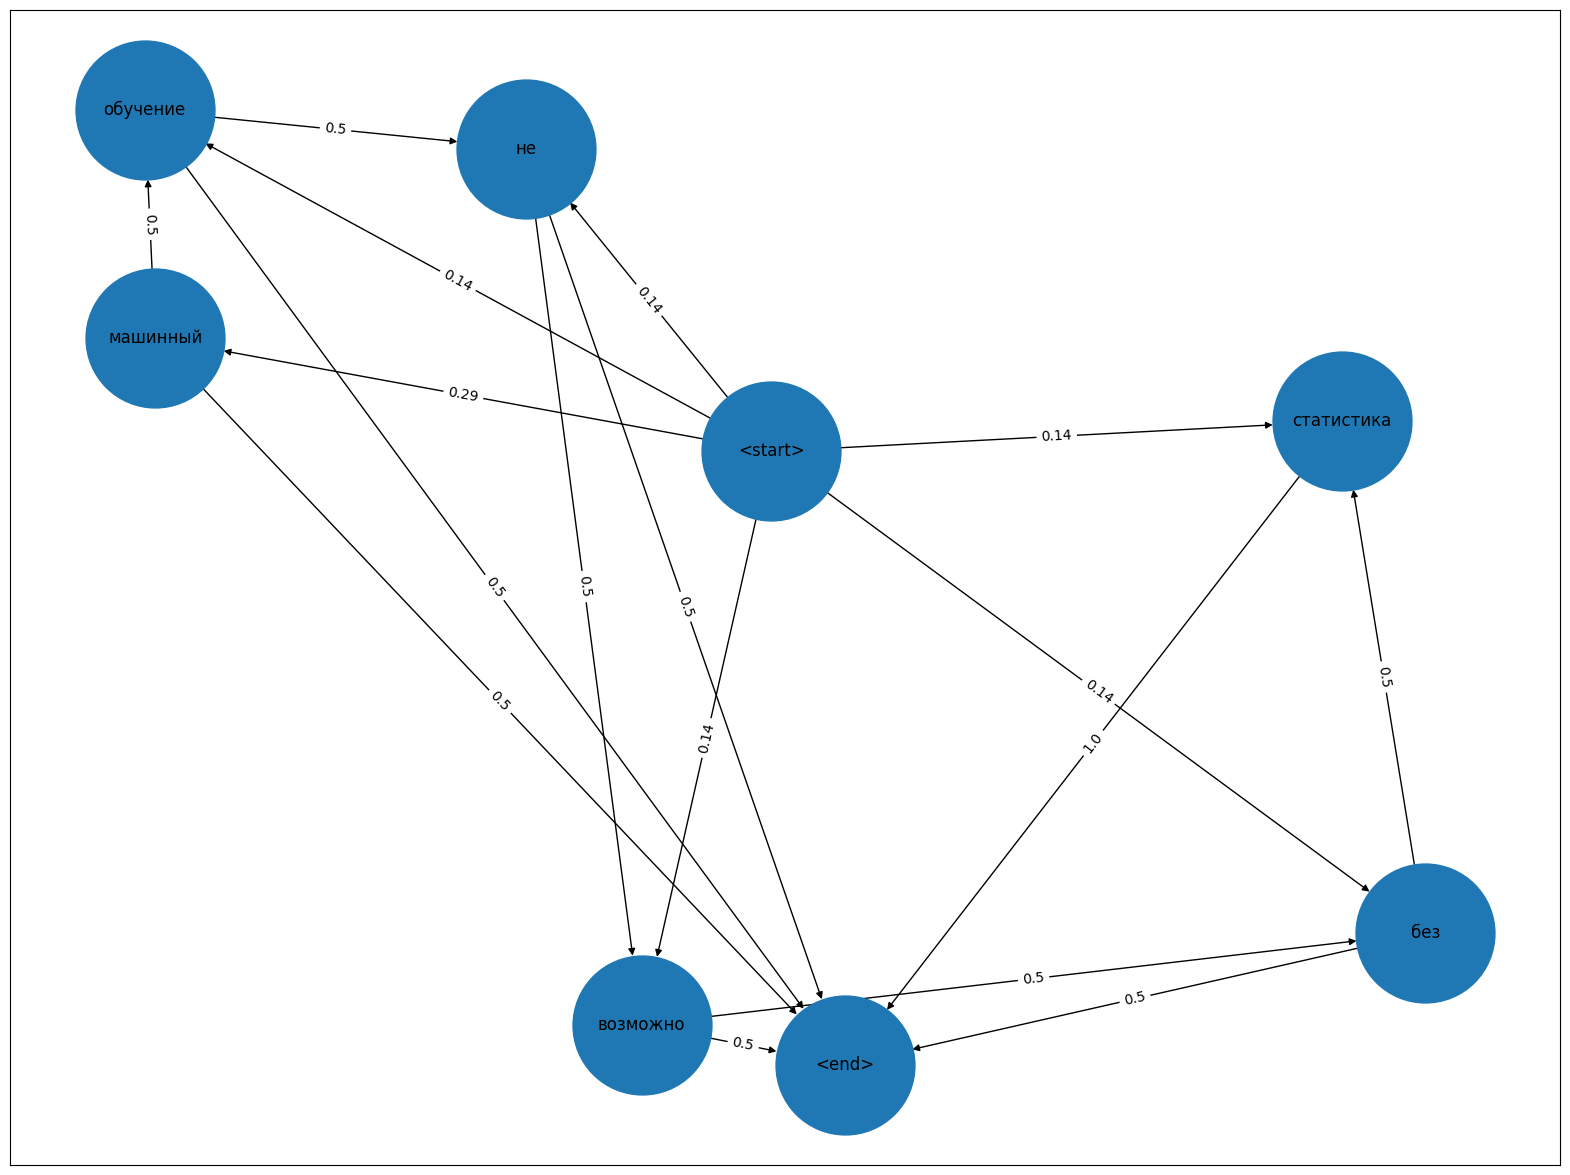

In [38]:
G = nx.DiGraph()
G.add_weighted_edges_from([get_line(line) for line in transition_probs_str.split('\n')])

fig, ax = plt.subplots(figsize=(20,15))
pos = nx.spring_layout(G, weight=None)
nx.draw_networkx(G, pos, ax=ax, node_size=10000)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

## 1.Наиболее вероятная последовательность


Вероятность выбрать путь $(w_1, \dots, w_l)$ определяется выражением:

$$P(<start>, w_1, \dots, w_l, <end>) = P(w_1|<start>) 
\cdot P(w_2|w_1) \cdot \dots \cdot P(<end>|w_{l})$$

Заметим, что вероятность перехода между любыми двумя состояниями кроме пары $(статистика, <end>)$ строго меньше 1. Это значит, что любая последовательность состояний $(w_1, \dots, w_k)$ будет менее вероятной чем последователность $(<start>, w_1, \dots, w_k, w_{k+1}, <end>)$ за исключением случая $w_{k+1} = статистика$.

$(статистика, <end>)$ - это минимальная последовательность, содержащая состояние $статистика$, и она имеет длину 3. Это значит, что любая последовательность длины 4 или более не может быть строго наиболее вероятной и имеет смысл рассматривать только последовательности длины 3. 

Среди таких последовательностей наиболее вероятная $(<start>, машинный, <end>)$. Вероятность выбора этого пути равна 0.145.

## 2. Последовательность с максимальным score

Скор определяется выражением:

$score = \frac{1}{l}\sum\limits_{i=1}^{l} \log p(w_i|w_{i-1}) = \log(\prod\limits_{i=1}^lp(w_i|w_{i-1})^{\frac{1}{l}})$

Последовательность с макисмальным скором:

$argmax(score) = argmax(\prod\limits_{i=1}^lp(w_i|w_{i-1})^{\frac{1}{l}})$

Вероятности перехода между любыми двумя состояниями $(w_k, w_{k+1})$, где каждое из состояний $w_k, w_{k+1}$ не равно \<start> или \<end>, равны №\frac{1}{2}$. Используя этот факт, преобразуем выражение для скора:

$score = log(0.5^{1 - 2/l} P(w_1|w_0)^{1/l} P(w_l|w_{l-1})^{1/l}) = log(\frac{1}{2}^{1 - 2/l} (p q)^{1/l})$

где $p = P(w_1|w_0)$, $q = P(w_l|w_{l-1})$. $P(w_1|w_0) \in \{0.14, 0.29\}$, $P(w_l|w_{l-1}) \in \{0.5, 1\}$.

Производная этой функции:

$\frac{\partial}{\partial l}score(l, p, q) = -\frac{log(4pq)}{l^2}$, $l \in [3, 7]$

Знак производной определяется выражением: 

$sign(4pq - 1)$

Отсюда получаем, что для пар $(p', q')$ из множества $\{(0.14, 0.5), (0.14, 1), (0.29, 0.5)\}$ функция score(l, p=p', q=q') возрастает при росте $l$, то есть максимум достигается при $l = 7$, а для пары $(0.29, 1)$ - убывает, то есть максимум достигается при $l = 3$. С учетом того, что score как функция от $pq$ возрастает, нужно сравнить значения score при двух наборах параметров (p, q): (0.29, 0.5) и (0.29, 1), причем для первой пары нужно взять максимальное возможное значение $l$ согласно топологии графа, а для второй минимальное. Из конфигурации графа следует, что оба эти значения равны 7. Таким образом получаем единственный оставшийся набор параметров \{l, p, q\} = \{7, 0.29, 1\}.

In [46]:
# Расчет максимального score

p, q, l = 0.29, 1, 7
score = np.log2((0.5 ** (1 - 2 / l)) * (p * q) ** (1 / l))
print("l = {}, score = {}".format(l, score))

l = 7, score = -0.9694107420924504


# Итоги
 

1. Наиболее вероятная последовательность $(<start>, машинный, <end>)$. Вероятность выбора этого пути равна 0,145.
2. Последовательность с наибольшим скором $(<start>, машинный, обучение, не возможно, без, статистика, <end>)$. Скор данного пути приблизительно равен -0,97.
